In [3]:
import mne
import pandas as pd
from statistics import covariance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
sns.set();

## Zhang & Wamsley

Download the data from the followung url: https://doi.org/10.6084/m9.figshare.22226692

**Note**: (matching the path below, or changing the path to match your location)

In [4]:
file = "EEG data/Zhang & Wamsley 2019/Data/PSG/subject010_Morning.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from c:\Users\20221750\Documents\MEDAI\EEG data\Zhang & Wamsley 2019\Data\PSG\subject010_Morning.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [5]:
raw_data

array([[ 9.41289002e-06,  8.69712781e-06,  7.91349161e-06, ...,
        -2.77357854e-06, -2.93400800e-06, -2.84762291e-06],
       [-6.14963751e-06, -5.77641813e-06, -5.40319875e-06, ...,
         1.23812702e-05,  1.29863380e-05,  1.34330702e-05],
       [-1.30709832e-05,  1.57126592e-05,  3.71684904e-05, ...,
        -8.33721720e-06, -5.70653297e-06, -2.20017531e-06],
       ...,
       [-7.22089565e-07, -6.87717338e-07, -6.25883702e-07, ...,
         6.13335111e-07,  6.42251429e-07,  6.64620656e-07],
       [ 8.57062807e-06,  8.07888894e-06,  7.61973492e-06, ...,
        -5.99788445e-06, -4.43972309e-06, -2.63272987e-06],
       [ 8.09038846e-06,  8.17474525e-06,  8.27911891e-06, ...,
         5.21224903e-06,  6.61771900e-06,  8.06322271e-06]])

In [6]:
count = 0
count2 = 0
for list in raw_data:
    count += 1
    for num in list:
        count2 += 1

count, count2

(63, 1840860)

In [7]:
count3 = 0
for num in channels:
    count3 += 1
count3

63

In [8]:
df_data = pd.DataFrame()
for i in range(0, len(channels)):
    df_data[channels[i]] = raw_data[i]

df_data

,LOC-A2,ROC-A1,EMG 1-2,Fpz-REF,Fp1-REF,Fp2-REF,Af7-REF,Af8-REF,Af3-REF,Af4-REF,...,Po3-REF,Po4-REF,Po8-REF,O1-REF,Oz-REF,O2-REF,Cz-REF,P4-REF,A1-REF,A2-REF
0,0.000009,-0.000006,-0.000013,0.000008,0.000010,0.000007,9.605347e-06,0.000005,0.000010,-0.000003,...,0.000005,-5.490468e-08,5.711341e-07,0.000005,1.504904e-06,1.268034e-06,1.666639e-11,-7.220896e-07,0.000009,0.000008
1,0.000009,-0.000006,0.000016,0.000008,0.000010,0.000007,9.517598e-06,0.000004,0.000010,-0.000003,...,0.000004,5.784864e-08,6.539687e-07,0.000004,1.482261e-06,1.325845e-06,1.666639e-11,-6.877173e-07,0.000008,0.000008
2,0.000008,-0.000005,0.000037,0.000008,0.000011,0.000007,9.790418e-06,0.000004,0.000011,-0.000003,...,0.000004,1.962143e-07,7.355289e-07,0.000004,1.514731e-06,1.394565e-06,1.666639e-11,-6.258837e-07,0.000008,0.000008
3,0.000007,-0.000005,0.000043,0.000008,0.000012,0.000008,1.042062e-05,0.000005,0.000012,-0.000003,...,0.000004,3.431175e-07,8.175140e-07,0.000004,1.603594e-06,1.470919e-06,1.666639e-11,-5.484098e-07,0.000007,0.000008
4,0.000006,-0.000004,0.000036,0.000009,0.000013,0.000009,1.130290e-05,0.000005,0.000013,-0.000003,...,0.000003,4.814832e-07,9.028974e-07,0.000003,1.734325e-06,1.548728e-06,1.666639e-11,-4.669349e-07,0.000007,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,-0.000002,0.000011,-0.000010,0.000007,0.000002,0.000007,-2.273502e-07,0.000006,0.000001,0.000004,...,-0.000005,1.867937e-07,3.583128e-07,-0.000005,-3.783088e-07,-1.272579e-09,1.666639e-11,5.707790e-07,-0.000008,0.000003
29216,-0.000002,0.000012,-0.000010,0.000008,0.000002,0.000008,7.745862e-07,0.000007,0.000002,0.000005,...,-0.000005,2.386072e-07,5.303540e-07,-0.000004,-1.591418e-07,2.397902e-07,1.666639e-11,5.884198e-07,-0.000007,0.000004
29217,-0.000003,0.000012,-0.000008,0.000008,0.000003,0.000008,1.877035e-06,0.000008,0.000003,0.000005,...,-0.000004,3.351688e-07,7.865041e-07,-0.000004,1.100107e-07,5.339377e-07,1.666639e-11,6.133351e-07,-0.000006,0.000005
29218,-0.000003,0.000013,-0.000006,0.000009,0.000004,0.000009,3.046493e-06,0.000009,0.000004,0.000006,...,-0.000003,4.714737e-07,1.119117e-06,-0.000003,4.210314e-07,8.608087e-07,1.666639e-11,6.422514e-07,-0.000004,0.000007


In [9]:
df_data.columns

Index(['LOC-A2', 'ROC-A1', 'EMG 1-2', 'Fpz-REF', 'Fp1-REF', 'Fp2-REF',
       'Af7-REF', 'Af8-REF', 'Af3-REF', 'Af4-REF', 'F7-REF', 'F5-REF',
       'F3-REF', 'F1-REF', 'Fz-REF', 'F2-REF', 'F4-REF', 'F6-REF', 'F8-REF',
       'Ft7-REF', 'Fc5-REF', 'Fc3-REF', 'Fc1-REF', 'Fcz-REF', 'Fc2-REF',
       'Fc4-REF', 'Fc6-REF', 'Ft8-REF', 'T7-REF', 'C5-REF', 'C3-REF', 'C1-REF',
       'C2-REF', 'C4-REF', 'C6-REF', 'T8-REF', 'Tp7-REF', 'Cp5-REF', 'Cp3-REF',
       'Cp1-REF', 'Cp2-REF', 'Cp4-REF', 'Cp6-REF', 'Tp8-REF', 'P7-REF',
       'P5-REF', 'P3-REF', 'P1-REF', 'Pz-REF', 'P2-REF', 'P6-REF', 'P8-REF',
       'Po7-REF', 'Po3-REF', 'Po4-REF', 'Po8-REF', 'O1-REF', 'Oz-REF',
       'O2-REF', 'Cz-REF', 'P4-REF', 'A1-REF', 'A2-REF'],
      dtype='object')

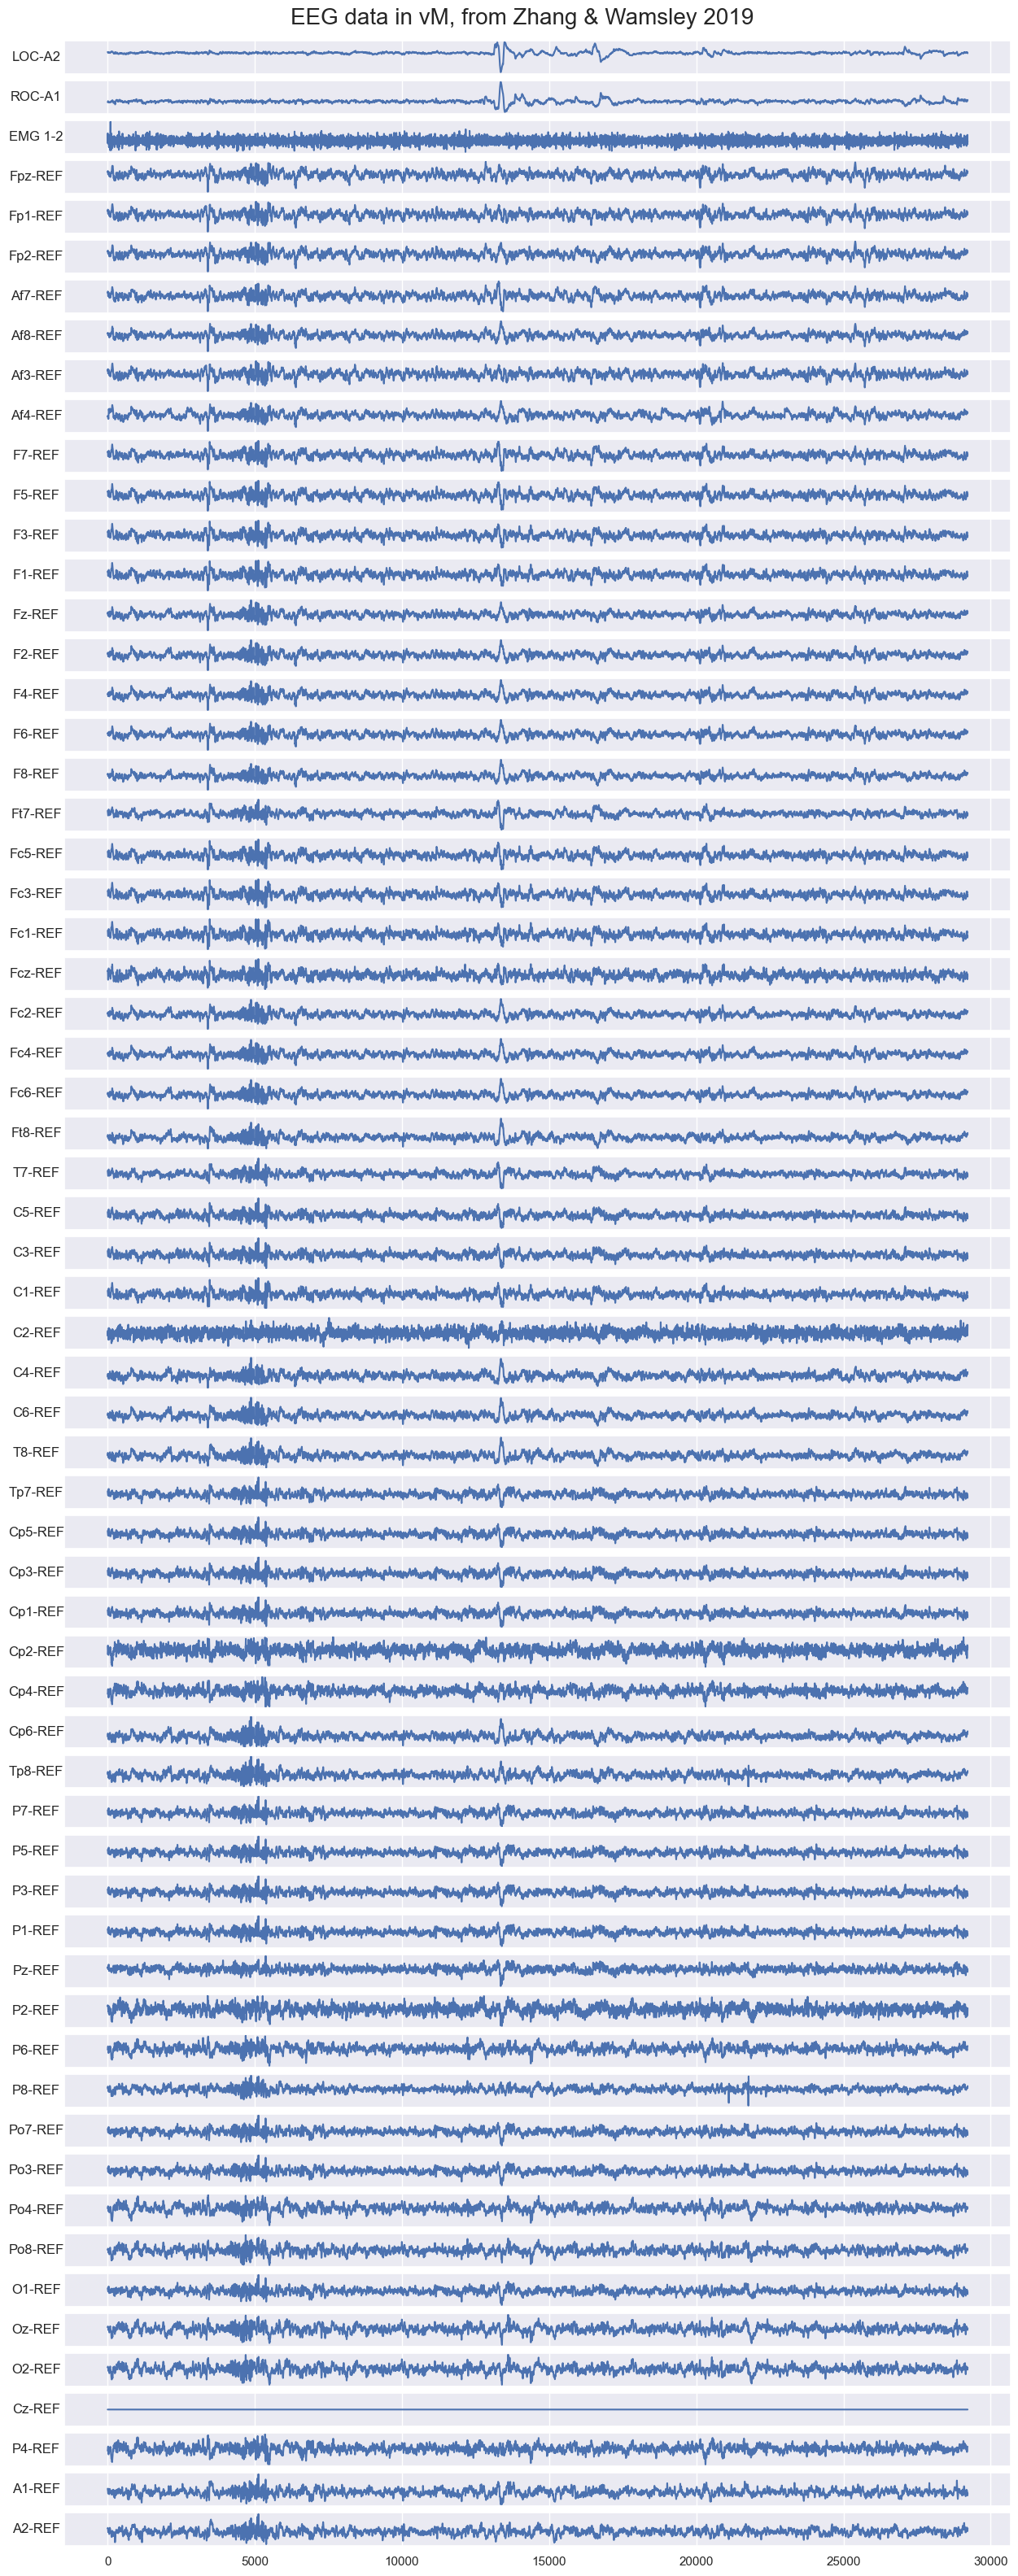

In [10]:
fig, ax = plt.subplots(nrows=len(df_data.columns), figsize=(15,40), sharex=True)
for i in range(len(df_data.columns)):
    ax[i].plot(df_data[df_data.columns[i]])
    ax[i].yaxis.set_major_locator(plt.NullLocator())
    ax[i].text(-0.03, 0.5, f'{df_data.columns[i]}', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

fig.suptitle('EEG data in vM, from Zhang & Wamsley 2019', fontsize=20, y=0.89);

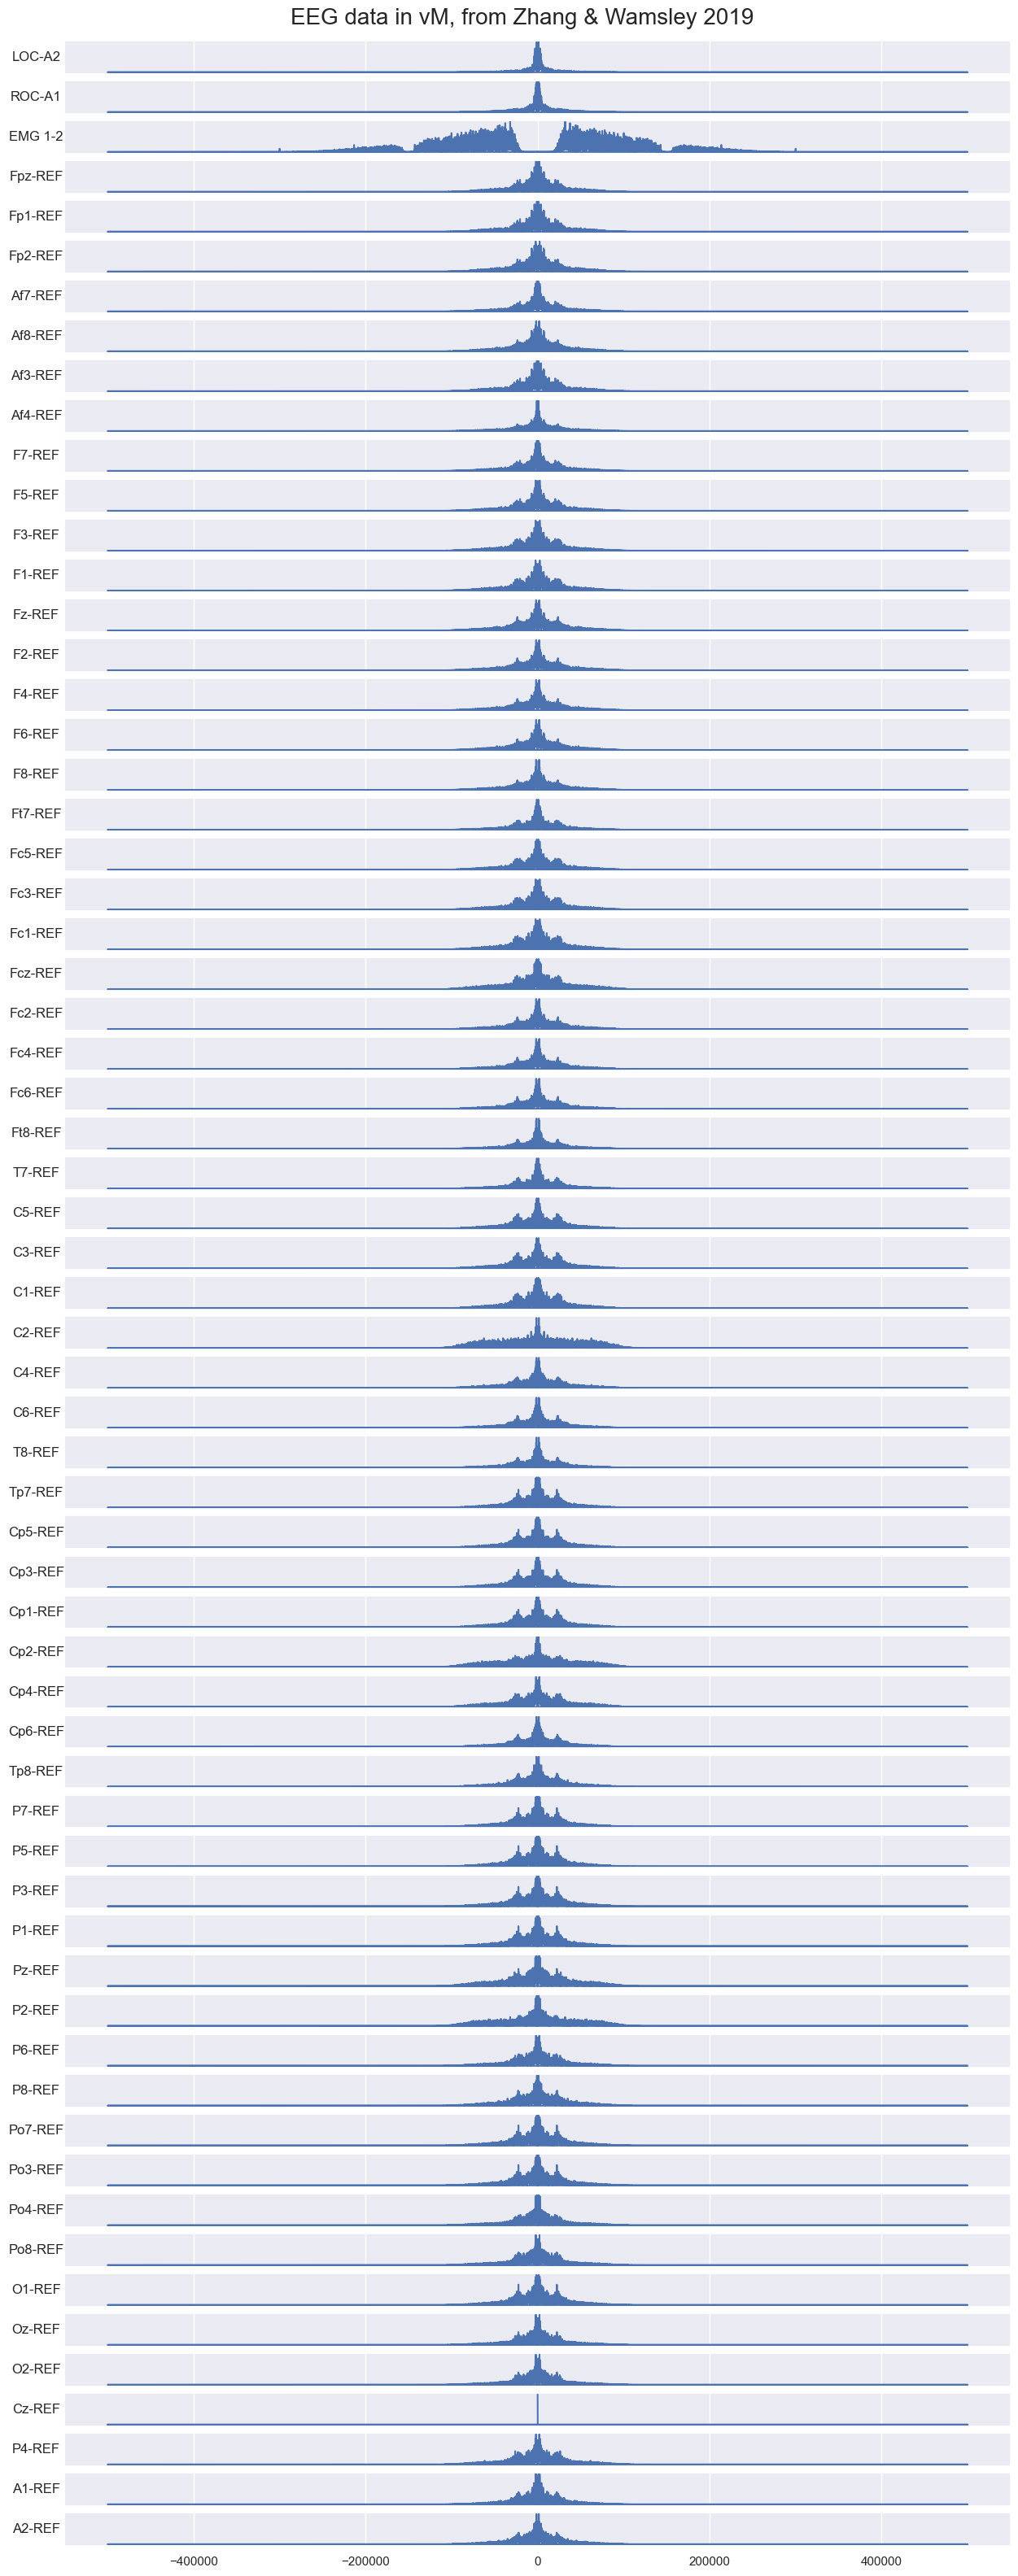

In [45]:
fig, ax = plt.subplots(nrows=len(df_data.columns), figsize=(15,40), sharex=True)

for i in range(len(df_data.columns)):
    columns_fourier = df_data[df_data.columns[i]].values
    yf = fft(columns_fourier)
    xf = fftfreq(len(yf), 1/1000000)
    ax[i].plot(xf, np.abs(yf))
    ax[i].yaxis.set_major_locator(plt.NullLocator())
    ax[i].text(-0.03, 0.5, f'{df_data.columns[i]}', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

fig.suptitle('EEG data in vM, from Zhang & Wamsley 2019', fontsize=20, y=0.89);

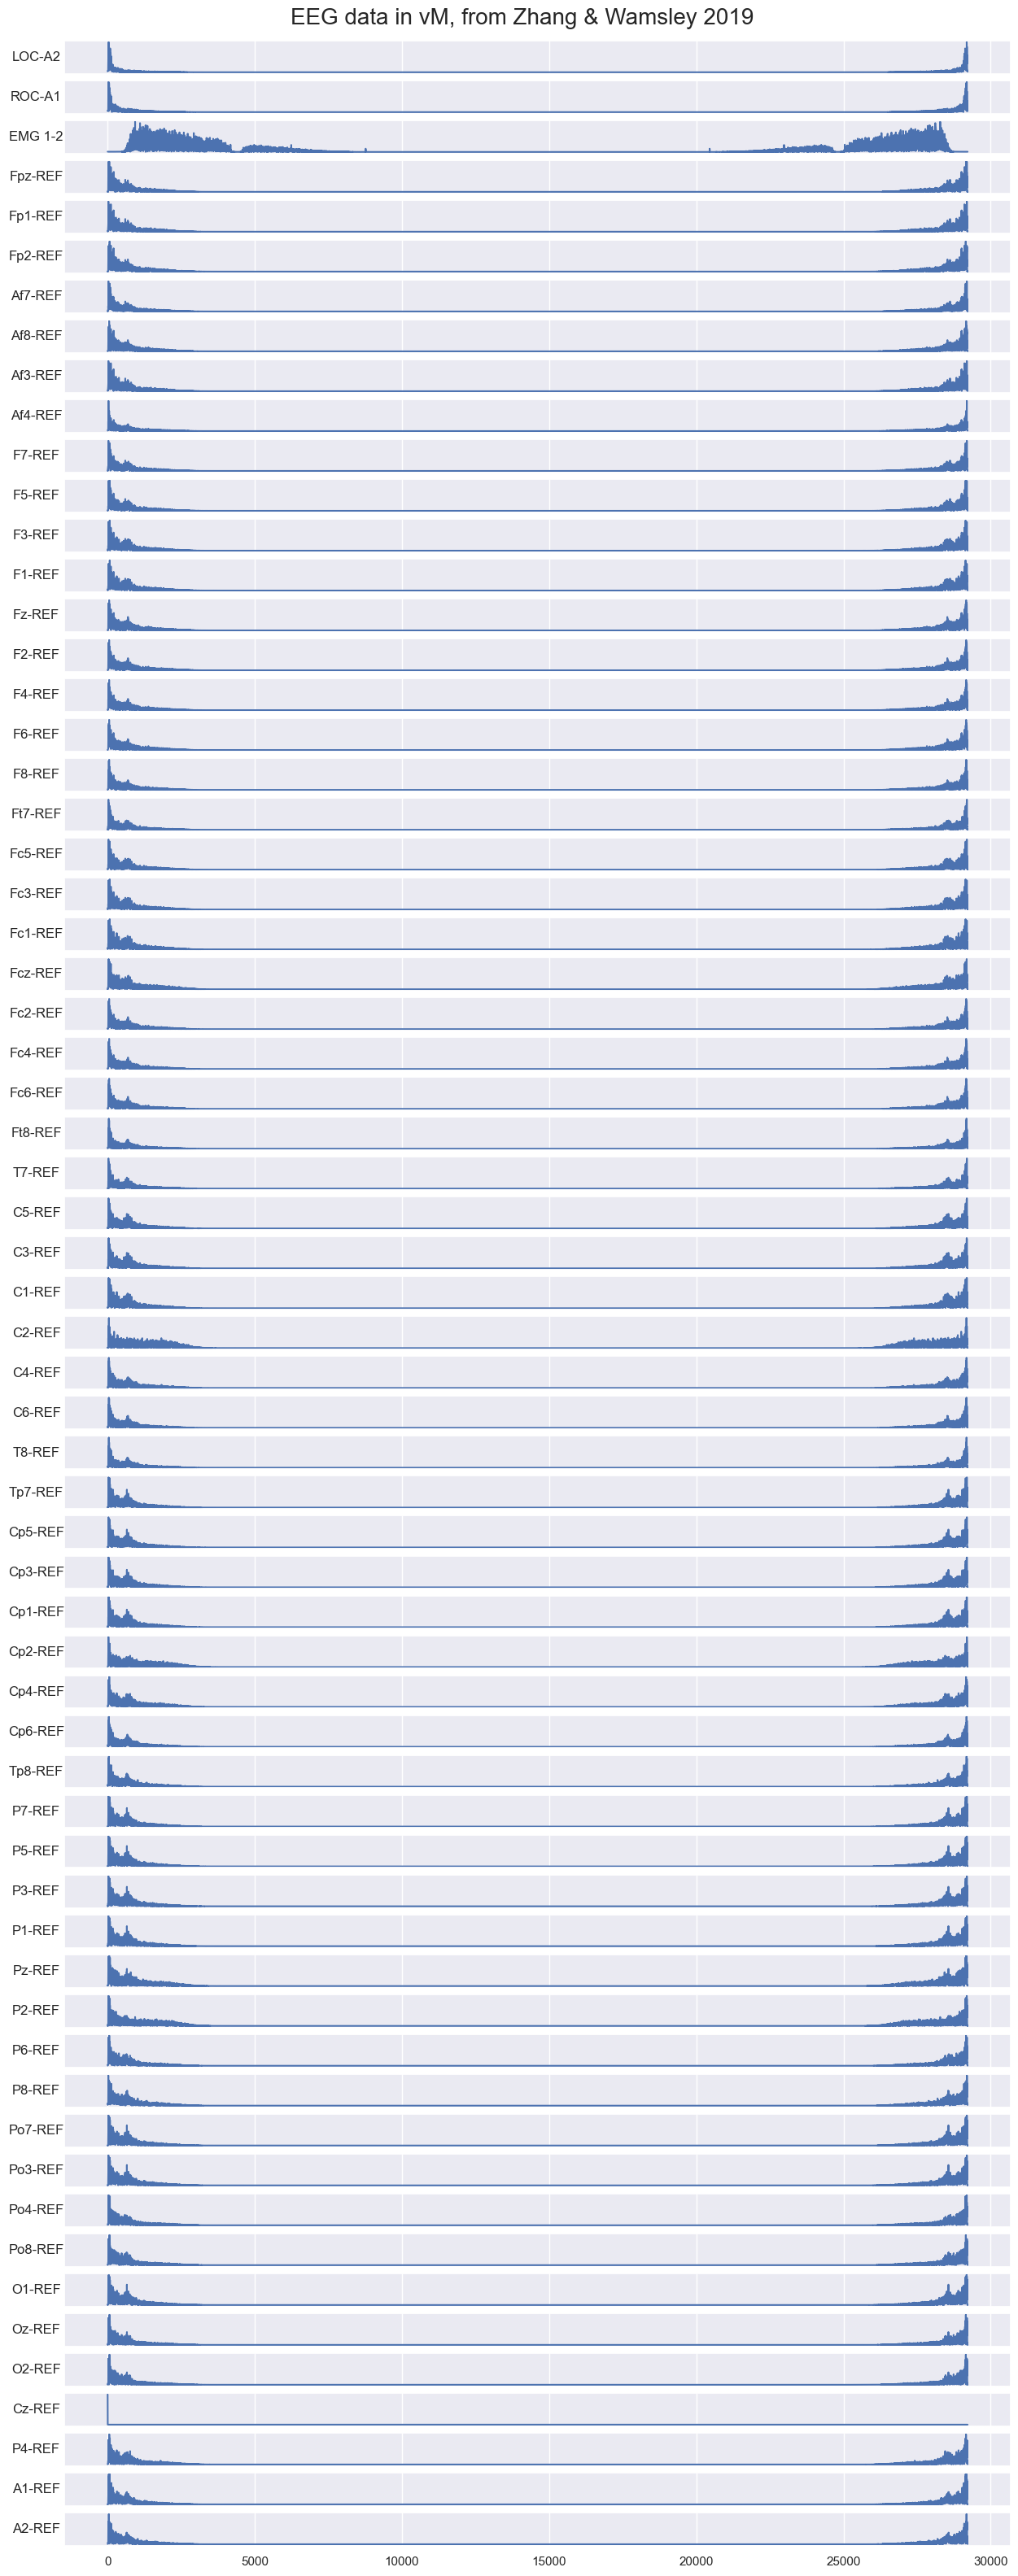

In [46]:
fig, ax = plt.subplots(nrows=len(df_data.columns), figsize=(15,40), sharex=True)

for i in range(len(df_data.columns)):
    columns_fourier = np.fft.fft(df_data[df_data.columns[i]])
    ax[i].plot(abs(columns_fourier))
    ax[i].yaxis.set_major_locator(plt.NullLocator())
    ax[i].text(-0.03, 0.5, f'{df_data.columns[i]}', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

fig.suptitle('EEG data in vM, from Zhang & Wamsley 2019', fontsize=20, y=0.89);

In [12]:
cov_hi = 0
chan_hi = []

for i in range(0, len(channels)):
    for j in range(0, len(channels)):
        col1 = df_data.iloc[:,i]
        col2 = df_data.iloc[:,j]
        cov = covariance(col1, col2)
        if i != j:
            if abs(cov) > cov_hi:
                cov_hi = cov
                chan_hi = [i, j]

In [13]:
cov_hi, chan_hi

(9.714476458681676e-11, [3, 5])

In [14]:
col1 = df_data.iloc[:,0]
col2 = df_data.iloc[:,0]
cov = covariance(col1, col2)
cov

3.174726720269662e-10

## Accuracy of EEG Biomakers

In [16]:
file = "EEG data/Accuracy of EEG Biomarkers/02^01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from c:\Users\20221750\Documents\MEDAI\EEG data\Accuracy of EEG Biomarkers\02^01.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\20221750\\Documents\\MEDAI\\EEG data\\Accuracy of EEG Biomarkers\\02^01.edf'

In [ ]:
raw_data

In [ ]:
count = 0
count2 = 0
for list in raw_data:
    count += 1
    for num in list:
        count2 += 1

print(f"Channels:     {count}")
print(f"Data poits:   {count2}")

In [ ]:
df_data = pd.DataFrame()
for i in range(0, len(channels)):
    df_data[channels[i]] = raw_data[i]

df_data

KeyError: 'EEG F7'

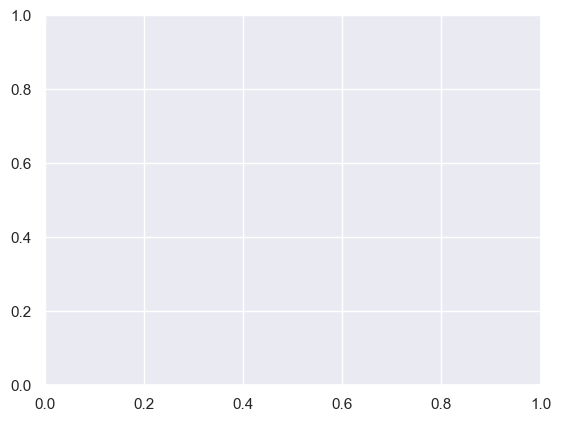

In [17]:
fig, ax = plt.subplots()
ax.plot(df_data['EEG F7'])
#ax.plot(df_data['LOC-A2'])